# Exploring Matplotlib Internals: Figures, Axes, and More

Most of the tutorials about programming start with a Hello World example.
Let's do the same for matplotlib.
Instead of Hello World, let's print "The quick brown fox jumps over the lazy dog" in the center of the figure [Wikipedia](https://en.wikipedia.org/wiki/The_quick_brown_fox_jumps_over_the_lazy_dog).

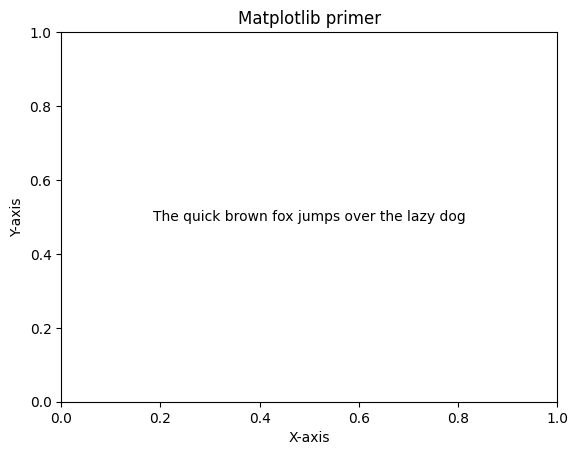

In [1]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.text(
    x=0.5,
    y=0.5,
    s="The quick brown fox jumps over the lazy dog",
    ha="center",
    va="center",
)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_title("Matplotlib primer")
fig.savefig("results/default_figure.png")
plt.show()

Three lines, and we have a Hello World example ready.
The standard next step is to look for examples in Matplotlib documentation: https://matplotlib.org/stable/gallery/index.html and enter the code.
That's the learning trajectory for most of the people.
 
Let's reverse the learning and learn backward, starting with a problem definition we want to address. 

**Problem 1**: Let's say we want to publish one page with one figure.
The figure should contain text, which should be the same size as the rest of the page.
A human should not be able to see that there is an image embedded in the page.

Here is the basic HTML template for you. Could you do it?

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>First Figure</title>
    <style>
        @font-face {
            font-family: "Roboto";
            src: url("fonts/RobotoMono-Regular.ttf");
        }

        .hello-world {
            font-family: "Roboto";
            font-size: 16px;
        }
    </style>
</head>
<body>
    <div class="hello-world">
        <h1>Welcome to My HTML</h1>
        <p>This is a simple webpage with text and a figure.</p>
        <p>Could you spot where is the figure?</p>
        <img src="results/pangram.png" alt="my figure" width="576">
        <p>1.0 2.0 3.5 The quick brown fox jumps over the lazy dog.</p>
    </div>
</body>
</html>
```

This is quite a complex problem.
And even experienced people might struggle with it.
First, let's break it down into more minor problems.

* Set the figure size to be the same as in the HTML template.
* Set the font and the font size in the figure to match the template.
* Remove axes, ticks, and other elements from the figure.
* Save the figure to a file.


In [2]:
from rich import print

fig, ax = plt.subplots()

print(f"The default size of the figure is {fig.get_size_inches()} inches.")
print(f"The default DPI (Dots per inch) is {fig.get_dpi()} pixels per inch.")

plt.close()  # this will close the figure in Jupyter

The default size of the figure is [6.4 4.8] inches.

The default DPI (Dots per inch) is 100.0 pixels per inch.

**We just learned the most important thing about the figure: it has a size and a DPI!**

When it comes to displaying or printing figures, it's usually a good idea to set the DPI of an image to 300 or 600.
However, this could be a problem for the web, where the DPI is not relevant, and the size of the image in pixels becomes too big.
That's when it's essential to set the figure's width to match your figure's desired width in the HTML template, Google Docs, or any editor of your choice.

In many practical applications, thinking in terms of proportions is beneficial. 
The width of the figure is usually fixed and determined by the size of the text block in the document.
To select the height, we can use the [Golden Ratio](https://en.wikipedia.org/wiki/Golden_ratio), which is a common design principle in art and architecture.

In [3]:
# Define a Golden Ratio constant https://en.wikipedia.org/wiki/Golden_ratio
phi = (1 + 5**0.5) / 2


def get_golden_value(value: float) -> float:
    """Multiply the value by the Golden Ratio"""
    return value / phi


print(
    f"The height of the figure with horizontal width of 600 is {get_golden_value(600)}"
)

The height of the figure with horizontal width of 600 is 370.8203932499369

We see that the recommended height of the figure is 371 pixels.
Using 400 in practice is fine, but this becomes handy when you deal with more complex plots with more than one axis, for example.

Let's go to **Problem 1** and try to create the HTML page with the figure to look uniform.
We will use the monospace font, as it's easier to match the size of the text.

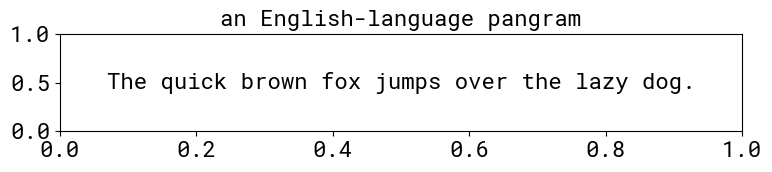

In [4]:
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties

custom_font = FontProperties(fname="./fonts/RobotoMono-Regular.ttf")
matplotlib.rcParams.update(
    {
        "font.family": custom_font.get_name(),
        "font.size": 16,
    }
)

fig, ax = plt.subplots(figsize=(8, 2))
ax.text(
    x=0.5,
    y=0.5,
    s="The quick brown fox jumps over the lazy dog.",
    ha="center",
    va="center",
)
ax.set_title("an English-language pangram", fontsize=16)
fig.tight_layout()
fig.savefig("results/pangram.svg")
fig.savefig("results/pangram.png", dpi=600)
plt.show()

Finding the correct figure dimensions is a bit tricky with Matplotlib because it does some optimizations to the figure size.
The easiest way to get the figure size in pixels is to save the figure to svg and export its dimensions in pixels from there.
The same applies for any other editor.

Try editing `index_pangram.html` and observe the results.

## Exercise 1

As a student, I fell in love with [Computer Modern](https://en.wikipedia.org/wiki/Computer_Modern) typefaces used in LaTeX.
And I couldn't find a way to use them in Matplotlib.
Could you help me use Computer Modern in the figure and drastically improve the integrity of figures in papers and presentations written in LaTeX?

*Hint*: use `./fonts/cmr10.ttf` font file.

You aim to create a document and use the Computer Modern font in the figure and the document. The result should look like the screenshot in the documentation for this workshop.


In [5]:
# TODO: your code here

# Notes about image formats

Another common mistake is setting the figure's DPI to a default value and saving the figure to PNG.

But it's better to utilize a vector format like SVG or PDF.
That way, the elements on your figure will look sharp on any device.

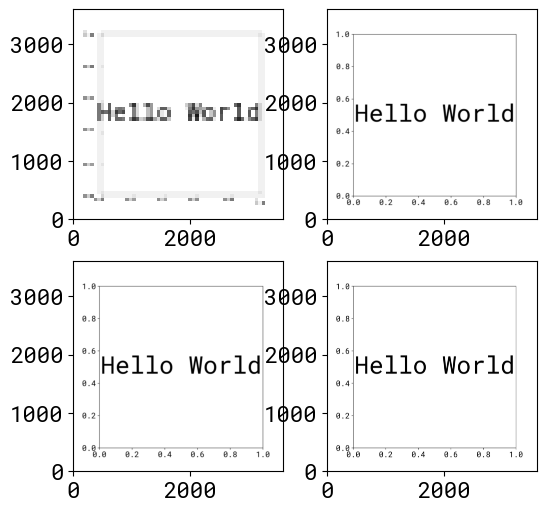

In [6]:
from matplotlib import pyplot as plt
from matplotlib import image


def figure_rendering(dpi=100):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.text(x=0.5, y=0.5, s="Hello World", fontsize=50, ha="center", va="center")
    fig.savefig(f"results/hello_world_{dpi:03}.png", dpi=dpi)
    plt.close()


for dpi in [10, 100, 300, 600]:
    figure_rendering(dpi)

image10 = image.imread("results/hello_world_010.png")
image100 = image.imread("results/hello_world_100.png")
image300 = image.imread("results/hello_world_300.png")
image600 = image.imread("results/hello_world_600.png")

height1, width1, _ = image10.shape
height2, width2, _ = image100.shape
height3, width3, _ = image300.shape
height4, width4, _ = image600.shape

common_width = max(width1, width2, width3, width4)
common_height = max(height1, height2, height3, height4)

fig, ax = plt.subplots(figsize=(6, 6), nrows=2, ncols=2)
ax[0, 0].imshow(image10, extent=[0, common_width, 0, common_height])
ax[0, 1].imshow(image100, extent=[0, common_width, 0, common_height])
ax[1, 0].imshow(image300, extent=[0, common_width, 0, common_height])
ax[1, 1].imshow(image600, extent=[0, common_width, 0, common_height])
plt.show()

fig.set_size_inches(10, 10)

# Matplotlib Figure, Axes

When we plot something with matplotlib, most of the time, we interact with the Axes object.

Let's see what is inside Figure and Axes objects. 
We'll use a rich library for this, which makes debugging and exploring the objects very enjoyable.

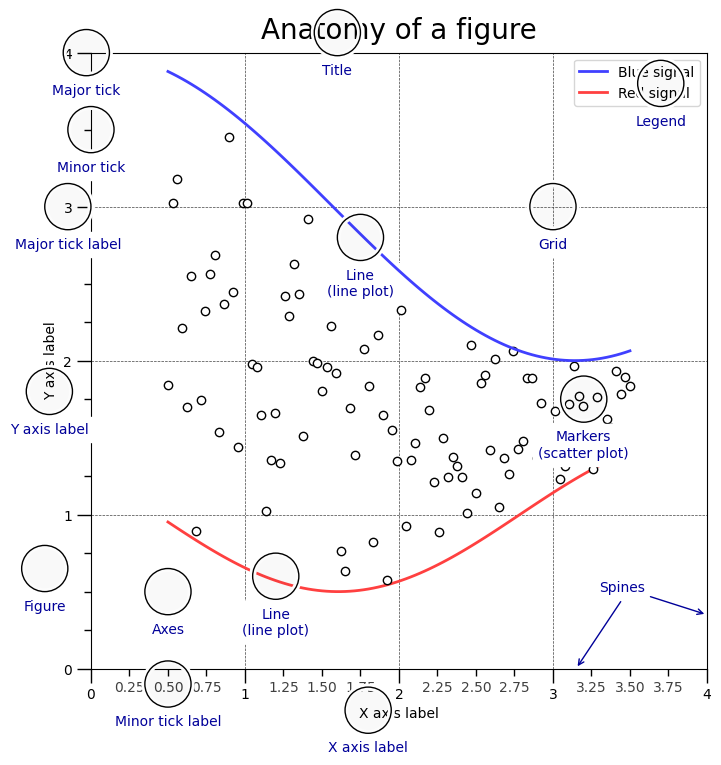

In [7]:
import matplotlib
from anatomy_of_figure import main

matplotlib.rcdefaults()
fig = main()

## Friendly Debugging with Rich

In [8]:
from rich import inspect

fig, ax = plt.subplots()
plt.close()

inspect(fig)
# to see the methods of the object
# inspect(fig, methods=True)
inspect(ax)

╭──────────────────────────── <class 'matplotlib.figure.Figure'> ─────────────────────────────╮
│ The top level container for all the plot elements.                                          │
│                                                                                             │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <Figure size 640x480 with 1 Axes>                                                       │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                             │
│           artists = []                                                                      │
│              axes = [<Axes: >]                                                              │
│              bbox = <matplotlib.transforms.TransformedBbox object at 0x12a8448f0>           │
│       bbox_inches = Bbox([[0.0, 0.0], [6.4, 4.8]])                                          │
│            canvas = <matplotlib.backends.backend_agg.FigureCanvasAgg object at 0x12a8454c0> │
│           clipbox = None                                                                    │
│               dpi = 100.0                                                                   │
│   dpi_scale_trans = <matplotlib.transforms.Affine2D object at 0x12a811c10>                  │
│           figbbox = <matplotlib.transforms.TransformedBbox object at 0x12a8448f0>           │
│            figure = <Figure size 640x480 with 1 Axes>                                       │
│           frameon = True                                                                    │
│            images = []                                                                      │
│           legends = []                                                                      │
│             lines = []                                                                      │
│         mouseover = False                                                                   │
│            number = 1                                                                       │
│             patch = <matplotlib.patches.Rectangle object at 0x12a844fb0>                    │
│           patches = []                                                                      │
│             stale = True                                                                    │
│    stale_callback = None                                                                    │
│      sticky_edges = _XYPair(x=[], y=[])                                                     │
│           subfigs = []                                                                      │
│       subplotpars = <matplotlib.figure.SubplotParams object at 0x12a847c50>                 │
│ suppressComposite = None                                                                    │
│             texts = []                                                                      │
│       transFigure = <matplotlib.transforms.BboxTransformTo object at 0x12a8455b0>           │
│    transSubfigure = <matplotlib.transforms.BboxTransformTo object at 0x12a8455b0>           │
│            zorder = 0                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────── <class 'matplotlib.axes._axes.Axes'> ─────────────────────────────────╮
│ An Axes object encapsulates all the elements of an individual (sub-)plot in                           │
│ a figure.                                                                                             │
│                                                                                                       │
│ ╭───────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <Axes: >                                                                                          │ │
│ ╰───────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                       │
│                     artists = <Axes.ArtistList of 0 artists>                                          │
│                        axes = <Axes: >                                                                │
│                      axison = True                                                                    │
│                        bbox = <matplotlib.transforms.TransformedBbox object at 0x12a8466f0>           │
│                   callbacks = <matplotlib.cbook.CallbackRegistry object at 0x12a8655e0>               │
│                  child_axes = []                                                                      │
│                     clipbox = None                                                                    │
│                 collections = <Axes.ArtistList of 0 collections>                                      │
│                  containers = []                                                                      │
│                     dataLim = Bbox([[inf, inf], [-inf, -inf]])                                        │
│                      figure = <Figure size 640x480 with 1 Axes>                                       │
│                   fmt_xdata = None                                                                    │
│                   fmt_ydata = None                                                                    │
│ ignore_existing_data_limits = True                                                                    │
│                      images = <Axes.ArtistList of 0 images>                                           │
│                     legend_ = None                                                                    │
│                       lines = <Axes.ArtistList of 0 lines>                                            │
│                   mouseover = False                                                                   │
│                        name = 'rectilinear'                                                           │
│                       patch = <matplotlib.patches.Rectangle object at 0x12a8677a0>                    │
│                     patches = <Axes.ArtistList of 0 patches>                                          │
│                      spines = <matplotlib.spines.Spines object at 0x12a750470>                        │
│                       stale = True                                                                    │
│                sticky_edges = _XYPair(x=[], y=[])                                                     │
│                      tables = <Axes.ArtistList of 0 tables>                                           │
│                       texts = <Axes.ArtistList of 0 texts>                                            │
│                       title = Text(0.5, 1.0, '')                                                      │
│            titleOffsetTrans = <matplotlib.transforms.ScaledTranslation object at 0x12a82fdd0>         │
│                   transAxes = <matplotlib.transforms.BboxTransformTo object at 0x12a750530>           │
│                   transData = <matplotlib.transforms.CompositeGenericTransfo

Rich inspect would be our best friend when we explore the objects in Matplotlib.

One of the best ways to learn a plotting library is to draw something on paper and try to reproduce it on the screen.

# Exercise 2
Recreate common chart.
<img src="./results/common_chart_xkcd.png" width="1200">

[07:50:36] INFO     Figure created successfully.                                                      ]8;id=458506;file:///Users/kislovskiy/development/Kislovskiy/ChartCraftHub/src/chartcrafthub/ex_1_2.py\ex_1_2.py]8;;\:]8;id=830482;file:///Users/kislovskiy/development/Kislovskiy/ChartCraftHub/src/chartcrafthub/ex_1_2.py#113\113]8;;\

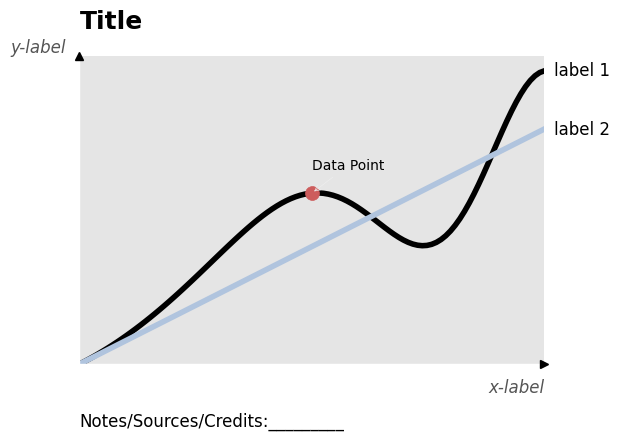

In [9]:
from ex_1_2 import main

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html#sphx-glr-gallery-style-sheets-style-sheets-reference-py
with plt.style.context("ggplot"):
    fig = main()
    fig.get_figure()

`%matplotlib inline` is an interesting thing.
the first time the plot is shown when we call `generate_xkcd_figure()`
the second time is when `plt.show(fig)` is called
third because `plt.show(fig)` returns `Null`; the notebook outputs the value of the last expression in a cell:)

# Conclusion

We've learned a lot about Matplotlib internals. 
Jump back to the Summary section of the documentation [here](https://kislovskiy.github.io/ChartCraftHub/section_1.html#summary) to see what we've learned.